The first step of our work will consist of understanding and cleaning our data.

##  Let's start by importing, visualizing, and understanding our data.

In [1]:
#include all the libraries we need for our work.

import seaborn as sns
import matplotlib
matplotlib.rcParams['font.size'] = 16
import matplotlib.pyplot as plt
import keras
import numpy as np
import os
from numpy import savetxt
from numpy import loadtxt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense  
from keras import backend as K
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import hvplot.pandas
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample

In [2]:
df = pd.read_csv(r"C:\Users\EG\Desktop\phd\Loan_status_2007-2020Q3.csv")

df.head()

C:\Users\EG\AppData\Local\Temp\ipykernel_5768\3560624471.py:1: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\EG\Desktop\phd\Loan_status_2007-2020Q3.csv")


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
# Shape of the DataFrame
df_shape = df.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 2925493
Number of columns: 142


our dataset contains 142 features and 2925493 examples. let's start by identifying the name of these different characteristics, their type and whether they contain missing values.

In [4]:
# Observing some general information about the dataset
display(df.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 142 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    Unnamed: 0                                  2925493 non-null  int64  
 1    id                                          2925493 non-null  object 
 2    loan_amnt                                   2925492 non-null  float64
 3    funded_amnt                                 2925492 non-null  float64
 4    funded_amnt_inv                             2925492 non-null  float64
 5    term                                        2925492 non-null  object 
 6    int_rate                                    2925492 non-null  object 
 7    installment                                 2925492 non-null  float64
 8    grade                                       2925492 non-null  object 
 9    sub_grade                                   

None

We can therefore assume that replacing more than 30% of an attribute's missing values can impact the quality of our data, and remove all features that contain more than 30% of their missing values, i.e. a quarter of their value.

In [6]:
#Determination of the proportions of missing values for each feature
missing_pro = df.isnull().mean().sort_values(ascending=False)

#selection, display and deletion of variables with more than 30% missing values.
columns_to_drop_2 = sorted(list(missing_pro[missing_pro > 0.3].index))
print("\n\n Drop Features: ", len(columns_to_drop_2))
df_cleaned = df.drop(columns=columns_to_drop_2)



 Drop Features:  37


In [7]:
df_cleaned .shape

(2925493, 105)

Our new dataset contains 105 variables. Since we are not domain experts, we need to analyze the segmentation of these variables and study their correlation to assess their impact on our target variable. This will help us decide whether to retain or discard them. However, any variable that is ambiguous will be retained to avoid losing information that might be crucial for the performance and precision of our model.

On the segmentation aspect of the variables, let's start by considering that the proposed solution aims to be usable. Therefore, it is necessary to retain variables that will be accessible in the context of using our classifier and that seem to have an impact on our target variable, ``loan_status``, from a segmentation perspective. Although this approach carries some risks, let's proceed with its implementation as a first step.

## Let’s start by examining the descriptions of our variables.

In [8]:
# Observing some general information about the dataset
display(df_cleaned.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 105 columns):
 #    Column                      Non-Null Count    Dtype  
---   ------                      --------------    -----  
 0    Unnamed: 0                  2925493 non-null  int64  
 1    id                          2925493 non-null  object 
 2    loan_amnt                   2925492 non-null  float64
 3    funded_amnt                 2925492 non-null  float64
 4    funded_amnt_inv             2925492 non-null  float64
 5    term                        2925492 non-null  object 
 6    int_rate                    2925492 non-null  object 
 7    installment                 2925492 non-null  float64
 8    grade                       2925492 non-null  object 
 9    sub_grade                   2925492 non-null  object 
 10   emp_title                   2661406 non-null  object 
 11   emp_length                  2720272 non-null  object 
 12   home_ownership              2925492 non-

None

``acc_now_delinq`` :The number of accounts on which the borrower is now delinquent. 

``acc_open_past_24mths`` :  Number of trades opened in past 24 months.

``addr_state`` :The state provided by the borrower in the loan application 

``all_util`` : Balance to credit limit on all trades 

``annual_inc`` : The self-reported annual income provided by the borrower during registration. 

``annual_inc_joint`` : The combined self-reported annual income provided by the co-borrowers during registration 

``application_type`` : Indicates whether the loan is an individual application or a joint application with two co-borrowers 

``avg_cur_bal`` : Average current balance of all accounts 

``bc_open_to_buy`` : Total open to buy on revolving bankcards. 

``bc_util`` : Ratio of total current balance to high credit/credit limit for all bankcard accounts. 

``chargeoff_within_12_mths`` : Number of charge-offs within 12 months 

``collection_recovery_fee`` : post charge off collection fee 

``collections_12_mths_ex_med`` : Number of collections in 12 months excluding medical collections 

``delinq_2yrs`` : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past... 

``delinq_amnt`` :  The past-due amount owed for the accounts on which the borrower is now delinquent. 

``desc`` : Loan description provided by the borrower 

``dti`` : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, e... 

``emp_length`` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year an... 

``dti_joint`` :  A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, exc... 

``earliest_cr_line`` : The month the borrower's earliest reported credit line was opened 

``emp_length`` : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year an... 

``emp_title`` : The job title supplied by the Borrower when applying for the loan.*  

``fico_range_high`` : The upper boundary range the borrower’s FICO at loan origination belongs to. 

``fico_range_low`` : The lower boundary range the borrower’s FICO at loan origination belongs to. 

``funded_amnt``: The total amount committed to that loan at that point in time. 

``funded_amnt_inv`` :The total amount committed by investors for that loan at that point in time. 

``grade`` : LC assigned loan grade 

``home_ownership`` : The home ownership status provided by the borrower during registration or obtained from the credit r... 

``id`` : A unique LC assigned ID for the loan listing. 

``il_util `` : Ratio of total current balance to high credit/credit limit on all install acct 

``initial_list_status``: The initial listing status of the loan. Possible values are – W, F 

``inq_fi`` : Number of personal finance inquiries

``inq_last_12m`` : Number of credit inquiries in past 12 months 

``inq_last_6mths`` : The number of inquiries in past 6 months (excluding auto and mortgage inquiries) 

``installment`` : The monthly payment owed by the borrower if the loan originates. 

``int_rate`` : Interest Rate on the loan 

`` issue_d `` The month which the loan was funded 

``last_credit_pull_d`` : The most recent month LC pulled credit for this loan 

``last_fico_range_high`` : The upper boundary range the borrower\’s last FICO pulled belongs to. 

``last_fico_range_low`` :The lower boundary range the borrower’s last FICO pulled belongs to.

``last_pymnt_amnt`` : Last total payment amount received

``last_pymnt_d `` : Last month payment was received

``loan_amnt`` :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit depa...

``loan_status`` :
Current status of the loan

``max_bal_bc``
Maximum current balance owed on all revolving accounts

``member_id``
A unique LC assigned Id for the borrower member.

``mo_sin_old_il_acct``
Months since oldest bank installment account opened

``mo_sin_old_rev_tl_op``
Months since oldest revolving account opened

``mo_sin_rcnt_rev_tl_op``
Months since most recent revolving account opened

``mo_sin_rcnt_tl``
Months since most recent account opened

``mort_acc``
Number of mortgage accounts.

``mths_since_last_delinq``
The number of months since the borrower's last delinquency.

``mths_since_last_major_derog``
Months since most recent 90-day or worse rating

``mths_since_last_record``
The number of months since the last public record.

``mths_since_rcnt_il``
Months since most recent installment accounts opened

``mths_since_recent_bc``
Months since most recent bankcard account opened.

``mths_since_recent_bc_dlq``
Months since most recent bankcard delinquency

``mths_since_recent_inq``
Months since most recent inquiry.

``mths_since_recent_revol_delinq``
Months since most recent revolving delinquency.

``next_pymnt_d``
Next scheduled payment date

``num_accts_ever_120_pd``
Number of accounts ever 120 or more days past due

``num_actv_bc_tl``
Number of currently active bankcard accounts

``num_actv_rev_tl``
Number of currently active revolving trades

``num_bc_sats``
Number of satisfactory bankcard accounts

``num_bc_tl``
Number of bankcard accounts

``num_il_tl``
Number of installment accounts

``num_op_rev_tl``
Number of open revolving accounts

``num_rev_accts``
Number of revolving accounts

``num_rev_tl_bal_gt_0``
Number of revolving trades with balance >0

``num_sats``
Number of satisfactory accounts

``num_tl_120dpd_2m``
Number of accounts currently 120 days past due (updated in past 2 months)

``num_tl_30dpd``
Number of accounts currently 30 days past due (updated in past 2 months)

``num_tl_90g_dpd_24m``
Number of accounts 90 or more days past due in last 24 months

``num_tl_op_past_12m``
Number of accounts opened in past 12 months

``open_acc``
The number of open credit lines in the borrower's credit file.

``open_acc_6m``
Number of open trades in last 6 months

``open_il_12m``
Number of installment accounts opened in past 12 months

``open_il_24m``
Number of installment accounts opened in past 24 months

``open_act_il``
Number of currently active installment trades

``open_rv_12m``
Number of revolving trades opened in past 12 months

``open_rv_24m``
Number of revolving trades opened in past 24 months

``out_prncp``
Remaining outstanding principal for total amount funded

``out_prncp_inv``
Remaining outstanding principal for portion of total amount funded by investors

``pct_tl_nvr_dlq``
Percent of trades never delinquent

``percent_bc_gt_75``
Percentage of all bankcard accounts > 75% of limit.

``policy_code``
publicly available policy_code=1 new products not publicly available
policy_code=2

``pub_rec``
Number of derogatory public records

``pub_rec_bankruptcies``
Number of public record bankruptcies

``purpose``
A category provided by the borrower for the loan request.

``pymnt_plan``
Indicates if a payment plan has been put in place for the loan
recoveries
post charge off gross recovery

``revol_bal``
Total credit revolving balance

``revol_util``
Revolving line utilization rate, or the amount of credit the borrower is using relative to all avail...

``sub_grade``
LC assigned loan subgrade

``tax_liens``
Number of tax liens

``term``
The number of payments on the loan. Values are in months and can be either 36 or 60.

``title``
The loan title provided by the borrower

``tot_coll_amt``
Total collection amounts ever owed

``tot_cur_bal``
Total current balance of all accounts

``tot_hi_cred_lim``
Total high credit/credit limit

``total_acc``
The total number of credit lines currently in the borrower's credit file

``total_bal_ex_mort``
Total credit balance excluding mortgage

``total_bal_il``
Total current balance of all installment accounts

``total_bc_limit``
Total bankcard high credit/credit limit

``total_cu_tl``
Number of finance trades

``total_il_high_credit_limit``
Total installment high credit/credit limit

``total_pymnt``
Payments received to date for total amount funded

``total_pymnt_inv``
Payments received to date for portion of total amount funded by investors

``total_rec_int``
Interest received to date

``total_rec_late_fee``
Late fees received to date

``total_rec_prncp``
Principal received to date

``total_rev_hi_lim``
Total revolving high credit/credit limit

``url``
URL for the LC page with listing data.

``verification_status``
Indicates if income was verified by LC, not verified, or if the income source was verified

``verified_status_joint``
Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income sourc...

``zip_code``
The first 3 numbers of the zip code provided by the borrower in the loan application.

``revol_bal_joint``
Sum of revolving credit balance of the co-borrowers, net of duplicate balances

``sec_app_fico_range_low``
FICO range (high) for the secondary applicant

``sec_app_fico_range_high``
FICO range (low) for the secondary applicant

``sec_app_earliest_cr_line``
Earliest credit line at time of application for the secondary applicant

``sec_app_inq_last_6mths``
Credit inquiries in the last 6 months at time of application for the secondary applicant

``sec_app_mort_acc``
Number of mortgage accounts at time of application for the secondary applicant

``sec_app_open_acc``
Number of open trades at time of application for the secondary applicant

``sec_app_revol_util``
Ratio of total current balance to high credit/credit limit for all revolving
accounts

``sec_app_open_act_il``
Number of currently active installment trades at time of application for the secondary applicant

``sec_app_num_rev_accts``
Number of revolving accounts at time of application for the secondary applicant

``sec_app_chargeoff_within_12_mths``
Number of charge-offs within last 12 months at time of application for the secondary applicant

``sec_app_collections_12_mths_ex_med``
Number of collections within last 12 months excluding medical collections at time of application fo...

``sec_app_mths_since_last_major_derog``
Months since most recent 90-day or worse rating at time of application for the secondary applicant

``hardship_flag``
Flags whether or not the borrower is on a hardship plan

``hardship_type``
Describes the hardship plan offering

``hardship_reason``
Describes the reason the hardship plan was offered

``hardship_status``
Describes if the hardship plan is active, pending, canceled, completed, or broken

``deferral_term``
Amount of months that the borrower is expected to pay less than the contractual monthly payment amou...

``hardship_amount``
The interest payment that the borrower has committed to make each month while they are on a hardship...

``hardship_start_date``
The start date of the hardship plan period

``hardship_end_date``
The end date of the hardship plan period

``payment_plan_start_date``
The day the first hardship plan payment is due. For example, if a borrower has a hardship plan perio...

``hardship_length``
The number of months the borrower will make smaller payments than normally obligated due to a hardsh...

``hardship_dpd``
Account days past due as of the hardship plan start date

``hardship_loan_status``
Loan Status as of the hardship plan start date

``orig_projected_additional_accrued_interest``
The original projected additional interest amount that will accrue for the given hardship payment pl...

``hardship_payoff_balance_amount``
The payoff balance amount as of the hardship plan start date

``hardship_last_payment_amount``
The last payment amount as of the hardship plan start date

``disbursement_method``
The method by which the borrower receives their loan. Possible values are: CASH, DIRECT_PAY

``debt_settlement_flag``
Flags whether or not the borrower, who has charged-off, is working with a debt-settlement company.

``debt_settlement_flag_date``
The most recent date that the Debt_Settlement_Flag has been set

``settlement_status``
The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELL...

``settlement_date``
The date that the borrower agrees to the settlement plan

``settlement_amount``
The loan amount that the borrower has agreed to settle for

``settlement_percentage``
The settlement amount as a percentage of the payoff balance amount on the loan

``settlement_term``
The number of months that the borrower will be on the settlement plan


We need to go through the list of variables above one by one to identify which variables to remove.

Let’s start by removing the variables with indices ``Unnamed: 0``, ``id`` that have no effect on the task at hand.

In [9]:
columns_to_drop_3 = ["Unnamed: 0", "id"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop_3)

Based on the description of the variables, in a first approach, we can remove the variables listed below.

In [10]:
columns_to_drop_4 = ['funded_amnt', 'funded_amnt_inv', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'collection_recovery_fee', 'last_fico_range_high', 'last_fico_range_low', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_rv_12m', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'hardship_flag', 'debt_settlement_flag']
df_cleaned = df_cleaned.drop(columns=columns_to_drop_4)

let's also delete the  ``grade, sub_grade`` variables as mentioned above.

In [11]:
#deletion of grade and sub_grade columns

columns_to_drop_1 = ["grade", "sub_grade"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop_1)

In [12]:
# Observing some general information about the dataset
display(df_cleaned.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   2925492 non-null  float64
 1   term                        2925492 non-null  object 
 2   int_rate                    2925492 non-null  object 
 3   installment                 2925492 non-null  float64
 4   emp_title                   2661406 non-null  object 
 5   emp_length                  2720272 non-null  object 
 6   home_ownership              2925492 non-null  object 
 7   annual_inc                  2925488 non-null  float64
 8   verification_status         2925492 non-null  object 
 9   issue_d                     2925492 non-null  object 
 10  loan_status                 2925492 non-null  object 
 11  pymnt_plan                  2925492 non-null  object 
 12  purpose                     2925492 non-null  object 
 1

None

We now have 45 variables. Before analyzing their behavior (distribution, presence of outliers, correlations with the target variable, etc.), let’s start by examining the distribution of our target variable.

In [13]:
df_cleaned['loan_status'].value_counts()

loan_status
Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
Name: count, dtype: int64

We notice that, besides the values ``Fully Paid`` and ``Charged Off``, our target attribute also takes on other values. Let’s start by removing the examples from our dataset that do not correspond to ``Fully Paid`` or ``Charged Off``.

In [14]:
# Keep only the rows where loan_status is "Fully Paid" or "Charged Off"
df_cleaned = df_cleaned[df_cleaned['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [15]:
df_shape = df_cleaned.shape
print("Number of rows:", df_shape[0])
print("Number of columns:", df_shape[1])

Number of rows: 1860331
Number of columns: 43


In [16]:
df_cleaned['loan_status'].value_counts()

loan_status
Fully Paid     1497783
Charged Off     362548
Name: count, dtype: int64

We can see that our dataset has decreased from 2,925,493 to 1,860,331.

Now, let's encode our target variable.

In [17]:
df_cleaned['loan_status'] = df_cleaned['loan_status'].apply(lambda x: 0 if x == 'Fully Paid' else 1)

Let’s display the information about the remaining data. 

In [18]:
# Observing some general information about the dataset
display(df_cleaned.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 1860331 entries, 0 to 2925492
Data columns (total 43 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1860331 non-null  float64
 1   term                        1860331 non-null  object 
 2   int_rate                    1860331 non-null  object 
 3   installment                 1860331 non-null  float64
 4   emp_title                   1728877 non-null  object 
 5   emp_length                  1743135 non-null  object 
 6   home_ownership              1860331 non-null  object 
 7   annual_inc                  1860331 non-null  float64
 8   verification_status         1860331 non-null  object 
 9   issue_d                     1860331 non-null  object 
 10  loan_status                 1860331 non-null  int64  
 11  pymnt_plan                  1860331 non-null  object 
 12  purpose                     1860331 non-null  object 
 13  ti

None

In [19]:
df_cleaned.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,1497783.0,24.689546,12.015939,2.0,16.0,23.0,31.0,165.0
1,362548.0,24.212874,12.163333,2.0,15.0,22.0,31.0,176.0


In [20]:
import hvplot.pandas

df_cleaned['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

We notice that our dataset is unbalanced. Class 0 dominates over class 1; therefore, we need to consider balancing the data to prevent the model from being biased towards one class over the other.

# Let's now look at the remaining variables

- loan_amnt

In [21]:
df_cleaned['loan_amnt'].value_counts()

loan_amnt
10000.0    145211
20000.0    100469
12000.0     98926
15000.0     97754
5000.0      70229
            ...  
700.0           1
750.0           1
800.0           1
38125.0         1
950.0           1
Name: count, Length: 1568, dtype: int64

<Axes: xlabel='loan_amnt', ylabel='Count'>

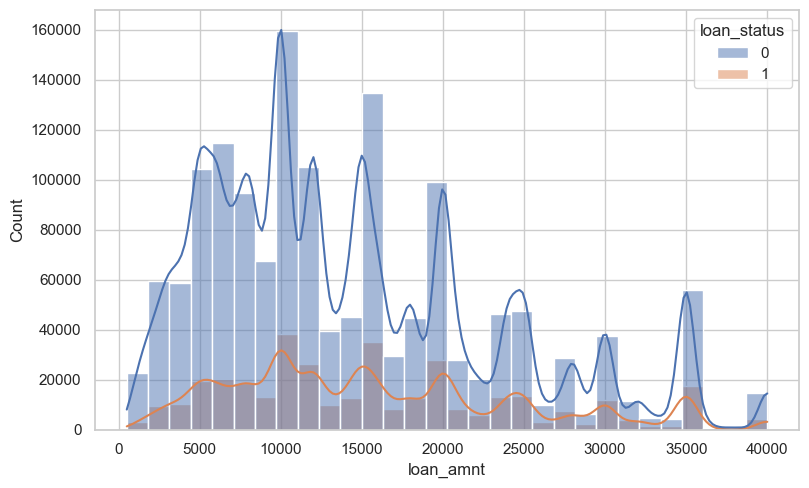

In [22]:
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
sns.set(style="whitegrid")

plt.subplot(2, 2, 1)
sns.histplot(x='loan_amnt', hue='loan_status', data=df_cleaned, bins=30, kde=True, color='blue')

The analysis of this variable and its distribution with respect to our target variable shows that it is relevant for our data.

- term

In [23]:
df_cleaned['term'].value_counts()

term
 36 months    1393299
 60 months     467032
Name: count, dtype: int64

On peut remarqué que 

In [24]:
df_cleaned['emp_title'].value_counts()

emp_title
Teacher                        30748
Manager                        27960
Owner                          15903
Registered Nurse               12592
RN                             12098
                               ...  
Program Tech II                    1
afcp                               1
Truck driver owner/operator        1
Primary teaher                     1
Contact input                      1
Name: count, Length: 456676, dtype: int64

In the same manner, we attempted to analyze the other variables in draft form but not thoroughly enough for all of them.

**We can also remove the following variables. After the analysis done above, given the time constraints, we could not go further. We are limiting ourselves to the initial variables. As a precaution, we will keep the remaining variables.**

In [25]:
columns_to_drop_4 = ["emp_length","emp_title","zip_code","title"]
df_cleaned = df_cleaned.drop(columns=columns_to_drop_4)

**Let’s now handle the missing values in our dataset.**

In [26]:
# Identify columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64','int8']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Impute numerical columns with mean
for col in numerical_cols:
    mean_value = df_cleaned[col].mean()
    df_cleaned[col].fillna(mean_value, inplace=True)

# Impute categorical columns with mode
for col in categorical_cols:
    mode_value = df_cleaned[col].mode()[0]
    df_cleaned[col].fillna(mode_value, inplace=True)

In [27]:
# Observing some general information about the dataset
display(df_cleaned.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 1860331 entries, 0 to 2925492
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1860331 non-null  float64
 1   term                        1860331 non-null  object 
 2   int_rate                    1860331 non-null  object 
 3   installment                 1860331 non-null  float64
 4   home_ownership              1860331 non-null  object 
 5   annual_inc                  1860331 non-null  float64
 6   verification_status         1860331 non-null  object 
 7   issue_d                     1860331 non-null  object 
 8   loan_status                 1860331 non-null  int64  
 9   pymnt_plan                  1860331 non-null  object 
 10  purpose                     1860331 non-null  object 
 11  addr_state                  1860331 non-null  object 
 12  dti                         1860331 non-null  float64
 13  ea

None

In [28]:
df_cleaned.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,...,open_rv_24m,max_bal_bc,total_rev_hi_lim,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000.0,36 months,10.65%,162.87,RENT,24000.0,Verified,Dec-2011,0,n,...,2.869238,5605.744834,33824.434738,1.60656,94.132333,0.0,0.0,50474.426628,22540.804365,43202.355631
1,2500.0,60 months,15.27%,59.83,RENT,30000.0,Source Verified,Dec-2011,1,n,...,2.869238,5605.744834,33824.434738,1.60656,94.132333,0.0,0.0,50474.426628,22540.804365,43202.355631
2,2400.0,36 months,15.96%,84.33,RENT,12252.0,Not Verified,Dec-2011,0,n,...,2.869238,5605.744834,33824.434738,1.60656,94.132333,0.0,0.0,50474.426628,22540.804365,43202.355631
3,10000.0,36 months,13.49%,339.31,RENT,49200.0,Source Verified,Dec-2011,0,n,...,2.869238,5605.744834,33824.434738,1.60656,94.132333,0.0,0.0,50474.426628,22540.804365,43202.355631
4,3000.0,60 months,12.69%,67.79,RENT,80000.0,Source Verified,Dec-2011,0,n,...,2.869238,5605.744834,33824.434738,1.60656,94.132333,0.0,0.0,50474.426628,22540.804365,43202.355631


In [29]:
# Observing some general information about the dataset
display(df_cleaned.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
Index: 1860331 entries, 0 to 2925492
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   loan_amnt                   1860331 non-null  float64
 1   term                        1860331 non-null  object 
 2   int_rate                    1860331 non-null  object 
 3   installment                 1860331 non-null  float64
 4   home_ownership              1860331 non-null  object 
 5   annual_inc                  1860331 non-null  float64
 6   verification_status         1860331 non-null  object 
 7   issue_d                     1860331 non-null  object 
 8   loan_status                 1860331 non-null  int64  
 9   pymnt_plan                  1860331 non-null  object 
 10  purpose                     1860331 non-null  object 
 11  addr_state                  1860331 non-null  object 
 12  dti                         1860331 non-null  float64
 13  ea

None

In [107]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

The choice of our model is also related to the processing and quality of the data we have. A different approach to processing and arranging the data could ultimately lead to better performance with other models. Therefore, it is necessary to conduct many simulations and experiments to find the model that will perform best for our problem.

### At this stage, let’s keep the dataset we have and try applying some classic algorithms.

## 2) Modeling Approaches for Loan Status Classification


To tackle the problem of classifying the loan status (where the goal is to predict if a loan is “Fully Paid” or “Charged Off”), we can consider several modeling approaches. Here are two common approaches with examples, along with their pros and cons.


## 1. Approach: Decision Tree Classifier

**Example Model**

A Decision Tree Classifier is used to build a decision tree for classifying loans based on their characteristics.

```python
# Initialize the decision tree classifier (customize as your need)
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)


## Advantages
- **Interpretability**: Decision trees are easy to understand and interpret. You can visualize the model and see how decisions are made based on the features.

- **No Need for Feature Scaling**: Decision trees do not require feature scaling or normalization.

- **Handles Categorical Variables**: Decision trees can directly handle categorical variables without complex encoding.

## Disadvantages
- **Overfitting**: Decision trees can easily overfit the training data, leading to poor performance on test data. This is often seen in very deep trees that capture noise in the data.

- **Instability**: Small changes in the data can lead to significant changes in the tree structure.

- **Performance**: A single decision tree is often less effective compared to ensembles of trees like those used in Random Forest.

## Solutions to Disadvantages
- **Pruning**: Techniques such as pruning can be used to avoid overfitting by reducing the size of the tree.

- **Ensemble Methods**: Techniques like Random Forest or Gradient Boosting Machines use ensembles of trees to improve performance and robustness.



## 2. Approach: Random Forest Classifier
**Example Model**

A Random Forest Classifier is an ensemble of multiple decision trees. Each tree contributes to the final decision by voting for a class.

```python
#@title Same workflow for random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier  ( set up the achitecture)
clf_1 = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=3,         # Maximum depth of each tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=4,     # Minimum number of samples required to be at a leaf node
    max_features=3,    # The number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random state for reproducibility
)

# Fit the model
clf_1.fit(X_train, y_train)


## Advantages
- **Accuracy**: Random Forest generally performs better than single decision trees because it combines predictions from multiple trees to obtain a more stable result.

- **Robustness**: It is less prone to overfitting compared to a single decision tree, due to the ensemble of trees and the use of bootstrapping.

- **Handling Categorical Variables and Missing Data**: Random Forest can handle categorical variables and missing data more effectively.

- **Feature Importance**: It provides insights into the importance of different features for making predictions.

## Disadvantages
- **Interpretability**: Random Forest models are more complex and harder to interpret compared to single decision trees.

- **Computational Cost**: Training a large number of trees can be computationally expensive in terms of time and resources, although this is manageable with modern computing power.

- **Model Complexity**: The model can become complex and require careful hyperparameter tuning.

## Solutions to Disadvantages
- **Feature Importance Analysis**: You can analyze feature importance to understand the most influential features despite model complexity.

- **Hyperparameter Optimization**: Techniques like grid search and cross-validation can be used to optimize the model’s hyperparameters and improve performance.

#### Comparison of Decision Tree Classifier and Random Forest Classifier

| **Criterion**               | **Decision Tree Classifier**                        | **Random Forest Classifier**                       |
|-----------------------------|------------------------------------------------------|-----------------------------------------------------|
| **Interpretability**       | High, easy to visualize                             | Low, more complex                                   |
| **Accuracy**                | Less accurate on its own                            | More accurate due to the ensemble of trees         |
| **Overfitting Robustness**  | High risk of overfitting                            | Low risk due to ensemble methods                   |
| **Handling Data**          | Good for categorical variables                       | Excellent for handling categorical variables and missing data |
| **Computational Cost**     | Less resource-intensive                              | More resource-intensive due to multiple trees      |
| **Model Complexity**       | Simple and straightforward                            | Complex, requires tuning of hyperparameters        |
| **Feature Importance**     | Not straightforward to analyze                       | Provides insights into the importance of features  |
| **Model Stability**        | Can be unstable due to sensitivity to data changes   | More stable due to averaging multiple trees        |
| **Training Time**          | Faster due to a single model                         | Slower due to training multiple trees               |
| **Hyperparameter Tuning**   | Minimal, mainly tree depth and split criteria       | Extensive, includes number of trees, max depth, etc.|



## 3. Choose one of the above approaches and implement your classifier, evaluate your
 ## model using one or more metrics you think are suited for the problem.

In [30]:
def encoder(df):
    # target
    y=df['loan_status']
    # Encode categorical variables in the data set ( required sufficient memory )
    X = pd.get_dummies(df.drop(columns=['loan_status']))
    return X,y

In [31]:
X,y= encoder(df_cleaned )

In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Initialize the decision tree classifier ( customize as your need )
clf = DecisionTreeClassifier(random_state=42)
# Fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9726411037448486


In [35]:
# Calculate model metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.2f}")

Confusion Matrix:
[[441531   7500]
 [  7769 101300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    449031
           1       0.93      0.93      0.93    109069

    accuracy                           0.97    558100
   macro avg       0.96      0.96      0.96    558100
weighted avg       0.97      0.97      0.97    558100

Accuracy Score: 0.97
ROC AUC Score: 0.96


In [ ]:
# Function to generate the learning curve
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1, scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot the learning curve
plot_learning_curve(clf, X_train, y_train, cv=5)

In [37]:
import joblib

joblib.dump(clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [38]:
clf_loaded = joblib.load('decision_tree_model.pkl')

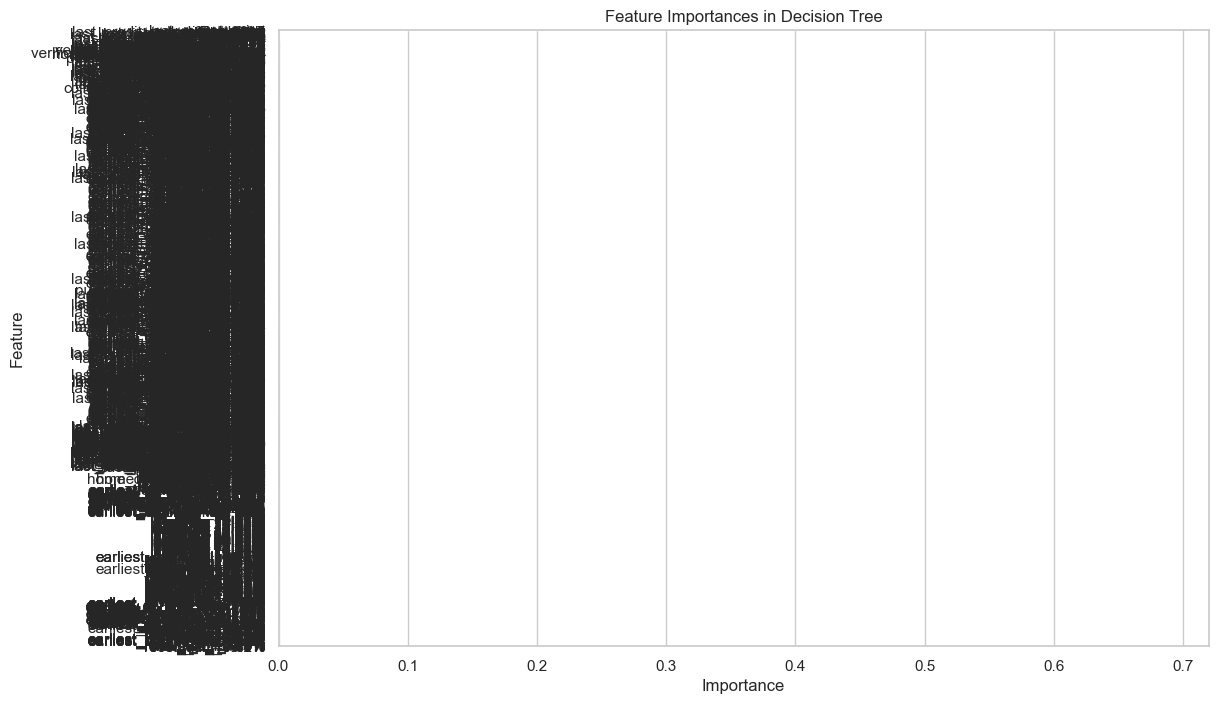

In [39]:
# Get feature importances
feature_importances = clf.feature_importances_

# Get feature names from the DataFrame columns
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances in Decision Tree')
plt.show()

## Now let's also try RandomForestClassifier

In [40]:
#@title Same workflow for random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier  ( set up the achitecture)
clf_1 = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=3,         # Maximum depth of each tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=4,     # Minimum number of samples required to be at a leaf node
    max_features=3,    # The number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random state for reproducibility
)

# Fit the model
clf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [41]:
# Predict on the test set
y_pred = clf_1.predict(X_test)

In [42]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8045708654363017


In [43]:
# Calculate model metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf_1.predict_proba(X_test)[:, 1]):.2f}")

Confusion Matrix:
[[449031      0]
 [109069      0]]

Classification Report:


C:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89    449031
           1       0.00      0.00      0.00    109069

    accuracy                           0.80    558100
   macro avg       0.40      0.50      0.45    558100
weighted avg       0.65      0.80      0.72    558100

Accuracy Score: 0.80
ROC AUC Score: 0.90


**We notice that RandomForest can't classify class 1 data properly, which may be due to imbalance in the data. Let's balance our data by performing a data reduction of class 0 data and observe the new result.**

In [44]:
# Separate the majority and minority classes
majority_class = df_cleaned[df_cleaned['loan_status'] == 0]
minority_class = df_cleaned[df_cleaned['loan_status'] == 1]

# Undersample the majority class
majority_class_downsampled = resample(majority_class, 
                                      replace=False,    # sampling without replacement
                                      n_samples=len(minority_class), # to match the minority class count
                                      random_state=42)  # for reproducibility

# Combine the minority class with the downsampled majority class
df_reducted = pd.concat([majority_class_downsampled, minority_class])


In [45]:
df_reducted['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350
)

:Bars   [loan_status]   (count)

**Let's train our two models again and see what impact the data balance has on our models.**

In [46]:
X,y= encoder(df_reducted)

In [47]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Initialize the decision tree classifier ( customize as your need )
clf_2 = DecisionTreeClassifier(random_state=42)
# Fit the model
clf_2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
# Predict on the test set
y_pred = clf_2.predict(X_test)

In [51]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9634669400401785


In [50]:
# Calculate model metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf_2.predict_proba(X_test)[:, 1]):.2f}")

Confusion Matrix:
[[104622   3930]
 [  4017 104960]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    108552
           1       0.96      0.96      0.96    108977

    accuracy                           0.96    217529
   macro avg       0.96      0.96      0.96    217529
weighted avg       0.96      0.96      0.96    217529

Accuracy Score: 0.96
ROC AUC Score: 0.96


**We note that the performance of our decission tree has not changed much.**

**Now let's also test our RandomForest**

In [52]:
#@title Same workflow for random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier  ( set up the achitecture)
clf_3 = RandomForestClassifier(
    n_estimators=100,       # Number of trees in the forest
    max_depth=3,         # Maximum depth of each tree
    min_samples_split=10,    # Minimum number of samples required to split an internal node
    min_samples_leaf=4,     # Minimum number of samples required to be at a leaf node
    max_features=3,    # The number of features to consider when looking for the best split
    bootstrap=True,         # Whether bootstrap samples are used when building trees
    random_state=42         # Random state for reproducibility
)

# Fit the model
clf_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=3, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

In [53]:
# Predict on the test set
y_pred = clf_3.predict(X_test)

In [54]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8596279116807414


In [55]:
# Calculate model metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf_3.predict_proba(X_test)[:, 1]):.2f}")

Confusion Matrix:
[[106061   2491]
 [ 28044  80933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.87    108552
           1       0.97      0.74      0.84    108977

    accuracy                           0.86    217529
   macro avg       0.88      0.86      0.86    217529
weighted avg       0.88      0.86      0.86    217529

Accuracy Score: 0.86
ROC AUC Score: 0.91


**We can see that the performance of our RandomForest has improved considerably.**

### In the following, we consider our decision tree as our model 

##  4. Explain (as in “explainability”) your model in terms of the classifier’s features.

The decision tree classifier offers a transparent and interpretable model, where the decision-making process can be easily visualized and understood. By examining the tree structure and the importance of each feature, we can gain valuable insights into the factors influencing the model's predictions. This makes decision trees particularly useful in applications where explainability is crucial.

After training the model, we can analyze the feature importance scores to understand the impact of each feature on the model's predictions.

In our case, we have many features after embedding, making our figure unreadable. However, the principle is as follows:
Our model selects the feature that best separates the data between Fully Paid and Charged Off loans, which is the feature with the highest score and is considered the root node. It then creates a separation threshold for this node. After separating the data using this node, the features with the highest scores for the two resulting groups are determined, and this process continues until the leaf nodes, which are the nodes where each path ends.

Thus, what makes this model interesting is that we can clearly explain to a non-technical decision-maker how the model makes decisions by using the corresponding decision tree.

### 5) Additional Steps with More Time or Resources
If I had more time or resources, I would take the following additional steps to improve the model and its performance:

**Data Engineering:**

**Data Cleaning and Selection**: The first thing to do with more time would be to clean and select the data that is relevant to our task. This requires a good understanding of the business problem and in-depth statistical analyses (such as looking for correlations between variables, identifying outliers through distribution analysis, etc.), as the quality of the model largely depends on the dataset.
**Data Preparation**: Properly prepare the data (such as encoding categorical variables and normalizing data) to try more complex models like neural networks, although these might not be very suitable for our task since they are not easily explainable (they are often considered "black boxes").

**Hyperparameter Optimization:**

**Grid Search/Random Search**: Conduct a comprehensive search for the best hyperparameters using techniques like grid search or random search.

**Bayesian Optimization**: Use advanced optimization techniques like Bayesian optimization to fine-tune hyperparameters more efficiently.

**Ensemble Methods:**

**Gradient Boosting**: Use models like Gradient Boosting Machines (GBM), XGBoost, or LightGBM to improve predictive performance.

**Stacking:** Combine multiple models through stacking to leverage their individual strengths.

**Cross-Validation:**

**K-Fold Cross-Validation**: Implement k-fold cross-validation to ensure the model's performance is robust and not dependent on a particular train-test split.

**Stratified K-Fold**: Use stratified k-fold cross-validation to maintain the proportion of classes in each fold, ensuring balanced validation.

**Model Interpretability:**

**SHAP Values**: Use SHAP (SHapley Additive exPlanations) values to understand the contribution of each feature to the model’s predictions.

**LIME**: Implement Local Interpretable Model-agnostic Explanations (LIME) to explain individual predictions.

### Additional Datasets to Enrich the Original Dataset

- To further enrich the dataset, the first solution I would propose is Data Augmentation. This would also be beneficial to balance the data given the dominance of class 0 over class 1 in the initial dataset.

- Next, as much as possible, collect data based on the variables we have identified. 
- Finally, find other methods to access data of similar characteristics from credible sources (potentially from Kaggle).

## 6)Scalability of the Solution

Scalability is an important aspect to consider when designing and deploying machine learning models, as it affects how well the solution can handle increasing amounts of data and prediction requests. Here is a discussion on the scalability of the Decision Tree Classifier solution in terms of the number of **loans/rows** in the training data and the number of predictions a possible inference endpoint will be asked to make in production.

### a. Number of Loans/Rows in the Training Data
#### 1.Training Time and Resources:

**Decision Tree Classifier**: Decision trees are generally efficient to train, especially compared to more complex models like neural networks. However, as the number of rows in the training data increases, the training time and memory usage will also increase. Decision trees can handle large datasets relatively well, but they can become computationally expensive if the dataset is extremely large.
**Optimizations**: To handle large datasets more efficiently, techniques such as distributed training (using frameworks like Apache Spark) can be employed. Additionally, sampling techniques or incremental learning can be used to manage very large datasets.

#### 2.Model Complexity:

The complexity of a decision tree grows with the size of the training data, as the tree can become deeper and have more nodes. Pruning techniques can be applied to reduce the size of the tree and prevent overfitting, which also helps in managing the scalability issue.

#### 3.Data Preprocessing:

Efficient data preprocessing techniques are crucial when dealing with large datasets. Using parallel processing for tasks like data cleaning, feature engineering, and normalization can significantly reduce preprocessing time.

### b. Number of Predictions at the Inference Endpoint

#### 1.Inference Time and Resources:

**Decision Tree Classifier**: Decision trees are generally fast at making predictions because the prediction process involves traversing the tree from the root to a leaf node, which is typically a quick operation. However, if the tree is very large and deep, the prediction time can increase.

**Optimizations**: To ensure low latency in production, the model can be deployed on a scalable infrastructure (such as a cloud-based environment with auto-scaling capabilities). Techniques like model compression and pruning can also help reduce the size of the model, thereby speeding up the inference process.

#### 2.Handling High Throughput:

- If the model needs to handle a high number of prediction requests, implementing a load-balanced and distributed system is essential. Using technologies like Kubernetes for container orchestration can help manage and scale the inference endpoints based on the incoming request load.

#### 3.Batch Predictions:

For applications where real-time predictions are not required, batch processing can be an effective way to handle large volumes of data. Predictions can be made in batches, reducing the computational load on the system during peak times.

#### 4.Caching and Latency Reduction:

Implementing caching mechanisms for frequently requested predictions can significantly reduce the load on the model and decrease latency. Additionally, using efficient data storage and retrieval systems can help in maintaining quick access to the required data.